In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = 'C:/Users/ADMIN/Desktop/afame_project/ECOMM DATA.xlsx'
xls = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
xls.sheet_names

['Orders', 'Returns', 'People']

In [13]:
orders_df = pd.read_excel(xls, sheet_name='Orders')

# Display the first few rows to understand the data structure
orders_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
Total Sales

In [14]:
# Convert 'Order Date' to datetime for trend analysis
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Calculate total sales
total_sales = orders_df['Sales'].sum()

# Group sales by year to analyze trends over time
orders_df['Year'] = orders_df['Order Date'].dt.year
sales_trend = orders_df.groupby('Year')['Sales'].sum()

# Determine best-selling products (by total sales)
best_selling_products = orders_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

total_sales, sales_trend, best_selling_products

(np.float64(12642501.909880001),
 Year
 2011    2.259451e+06
 2012    2.677439e+06
 2013    3.405746e+06
 2014    4.299866e+06
 Name: Sales, dtype: float64,
 Product Name
 Apple Smart Phone, Full Size                                86935.7786
 Cisco Smart Phone, Full Size                                76441.5306
 Motorola Smart Phone, Full Size                             73156.3030
 Nokia Smart Phone, Full Size                                71904.5555
 Canon imageCLASS 2200 Advanced Copier                       61599.8240
 Hon Executive Leather Armchair, Adjustable                  58193.4841
 Office Star Executive Leather Armchair, Adjustable          50661.6840
 Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
 Samsung Smart Phone, Cordless                               48653.4600
 Nokia Smart Phone, with Caller ID                           47877.7857
 Name: Sales, dtype: float64)

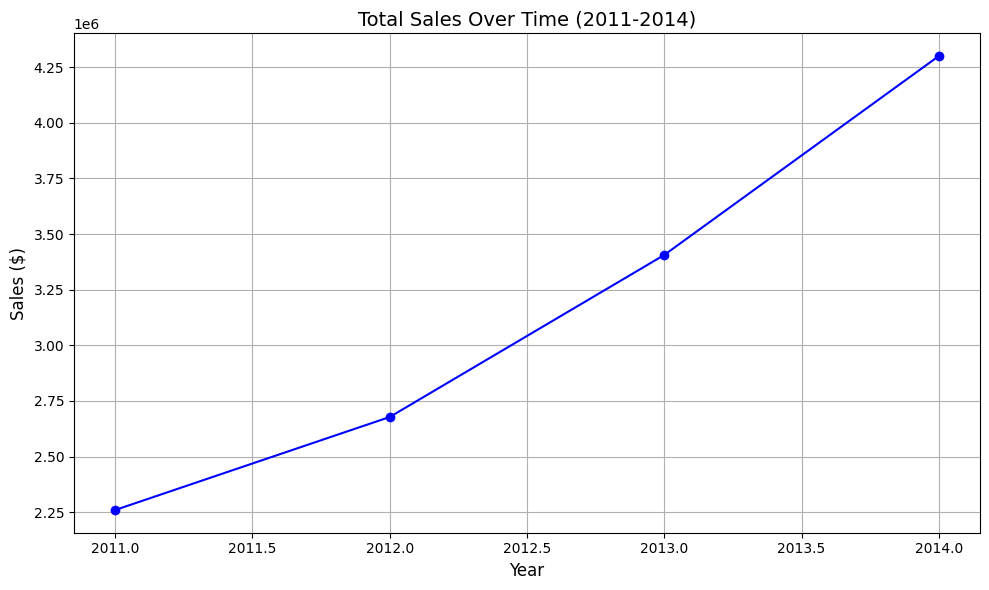

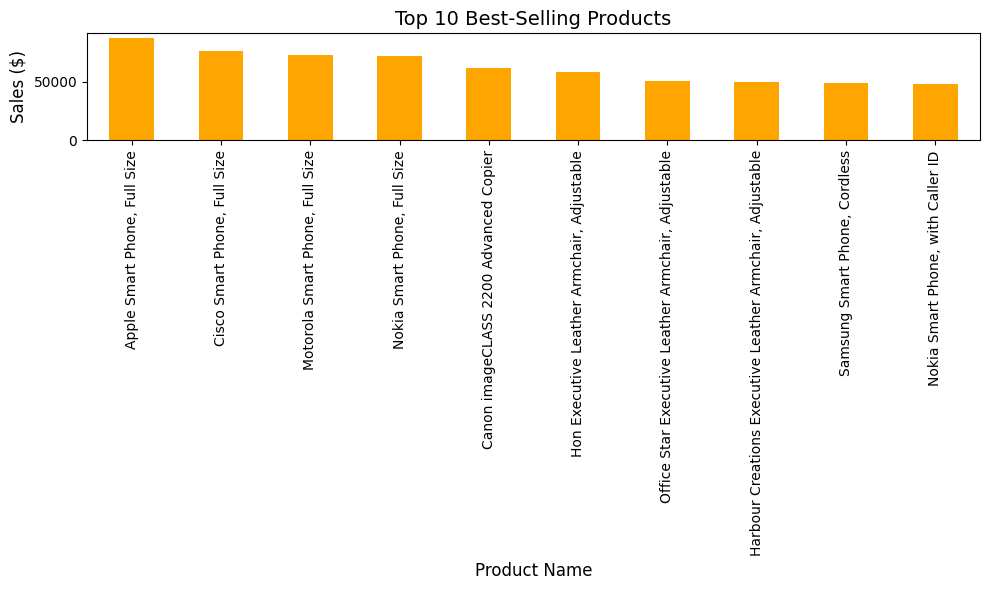

In [15]:
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='b')
plt.title('Total Sales Over Time (2011-2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot top 10 best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', color='orange')
plt.title('Top 10 Best-Selling Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()